<a href="https://colab.research.google.com/github/nataliashalaeva/ml/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/mushrooms.csv', sep=',')

In [3]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


0. Провести предварительный анализ данных

In [4]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [23]:
from sklearn.preprocessing import LabelEncoder

# Инициализация кодировщика
le = LabelEncoder()

# Преобразуем все столбцы, кроме 'class', в числовые значения
for column in df.columns:
    if column != 'class':  # Не преобразуем целевую переменную
        df[column] = le.fit_transform(df[column])

# Посмотрим на преобразованные данные
print(df.head())

  class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0     p          5            2          4        1     6                1   
1     e          5            2          9        1     0                1   
2     e          0            2          8        1     3                1   
3     p          5            3          8        1     6                1   
4     e          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-color-above-ring  \
0             0          1           4  ...                       7   
1             0          0           4  ...                       7   
2             0          0           5  ...                       7   
3             0          1           5  ...                       7   
4             1          0           4  ...                       7   

   stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                       7   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   int64 
 2   cap-surface               8124 non-null   int64 
 3   cap-color                 8124 non-null   int64 
 4   bruises                   8124 non-null   int64 
 5   odor                      8124 non-null   int64 
 6   gill-attachment           8124 non-null   int64 
 7   gill-spacing              8124 non-null   int64 
 8   gill-size                 8124 non-null   int64 
 9   gill-color                8124 non-null   int64 
 10  stalk-shape               8124 non-null   int64 
 11  stalk-root                8124 non-null   int64 
 12  stalk-surface-above-ring  8124 non-null   int64 
 13  stalk-surface-below-ring  8124 non-null   int64 
 14  stalk-color-above-ring  

In [14]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


1. Определение съедобности гриба
По заданным характеристикам гриба предсказать, является ли он съедобным или
ядовитым.
• Целевая переменная: Class (e/p) - бинарная классификация.
• Признаки: Все остальные признаки в датасете.
• Методы: логистическая регрессия, дерево решений (с визуализацией), случайный лес
• Метрики: Accuracy, Precision, Recall , F1-score, AUC-ROC , Матрица ошибок

In [ ]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(6499, 22) (1625, 22)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

e = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision: {precision_score(y_test, y_pred_lr)}')
print(f'Recall: {recall_score(y_test, y_pred_lr)}')
print(f'F1-Score: {f1_score(y_test, y_pred_lr)}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_lr)}')

print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9476923076923077
Precision: 0.9439490445859873
Recall: 0.9475703324808185
F1-Score: 0.9457562220804084
AUC-ROC: 0.9476878945915361
[[799  44]
 [ 41 741]]


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC: 1.0
[[843   0]
 [  0 782]]


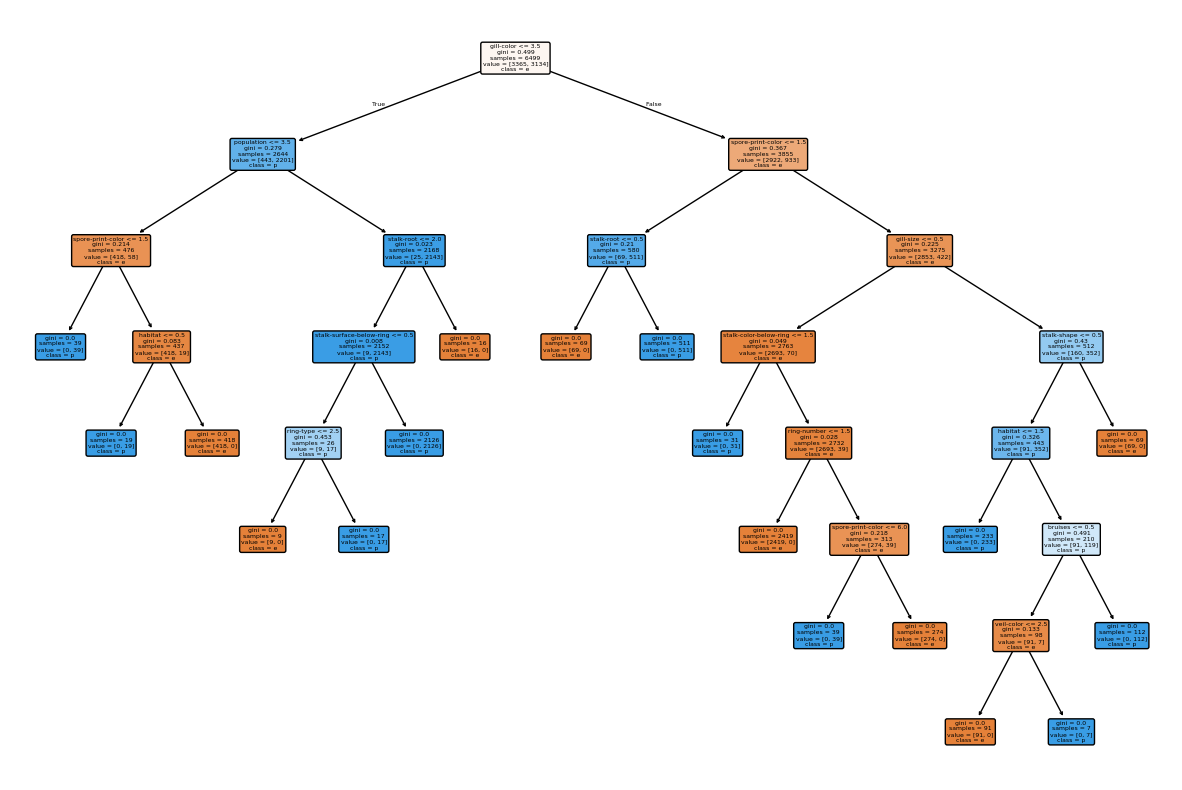

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(f'Precision: {precision_score(y_test, y_pred_dt)}')
print(f'Recall: {recall_score(y_test, y_pred_dt)}')
print(f'F1-Score: {f1_score(y_test, y_pred_dt)}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_dt)}')

print(confusion_matrix(y_test, y_pred_dt))

plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['e', 'p'], rounded=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Recall: {recall_score(y_test, y_pred_rf)}')
print(f'F1-Score: {f1_score(y_test, y_pred_rf)}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_rf)}')

print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC: 1.0
[[843   0]
 [  0 782]]


3. Предсказание структуры пластинок
Предсказать структуру пластинок гриба, основываясь на других его характеристиках.
Решить как отдельные задачи для Gill-attachment, Gill-spacing, Gill-size, и как задачу
многоклассовой классификации с одной целевой переменной, объединяющей все три
характеристики.
• Целевая переменная:
* Gill-attachment (attached, descending, free, notched) - многоклассовая классификация.
* Gill-spacing (close, crowded, distant) - многоклассовая классификация.
* Gill-size (broad, narrow) - бинарная классификация.
• Признаки: Все признаки, кроме выбранных целевых переменных.
• Методы: логистическая регрессия, дерево решений (с визуализацией), случайный лес,
градиентный бустинг , наивный байесовский классификатор, Метод k-ближайших
соседей.
• Метрики: Accuracy, Precision, Recall , F1-score, AUC-ROC , Матрица ошибок


==== Обучение моделей для gill-attachment ====

=== Логистическая регрессия ===
Accuracy  : 0.9969
Precision : 0.9970
Recall    : 0.9969
F1-Score  : 0.9969


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


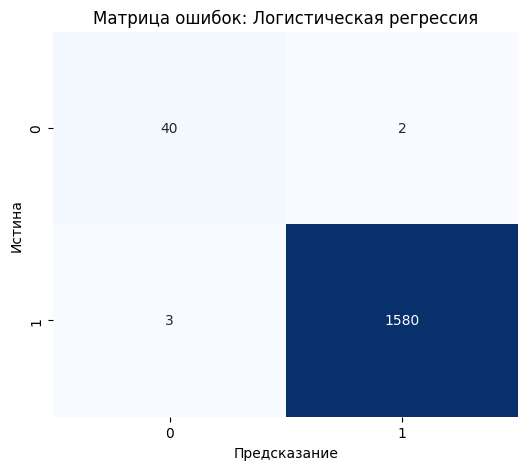


=== Дерево решений ===
Accuracy  : 0.9969
Precision : 0.9970
Recall    : 0.9969
F1-Score  : 0.9969


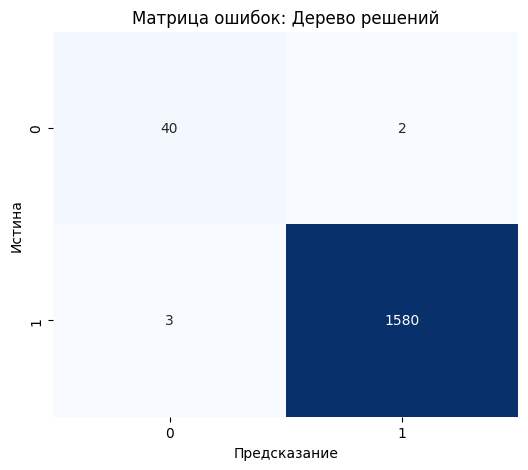


=== Случайный лес ===
Accuracy  : 0.9969
Precision : 0.9970
Recall    : 0.9969
F1-Score  : 0.9969


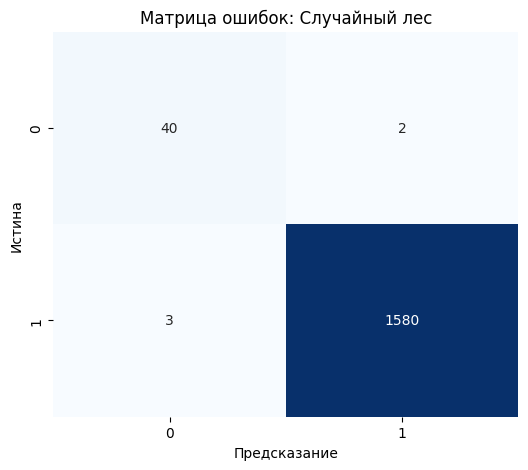


=== Градиентный бустинг ===
Accuracy  : 0.9969
Precision : 0.9970
Recall    : 0.9969
F1-Score  : 0.9969


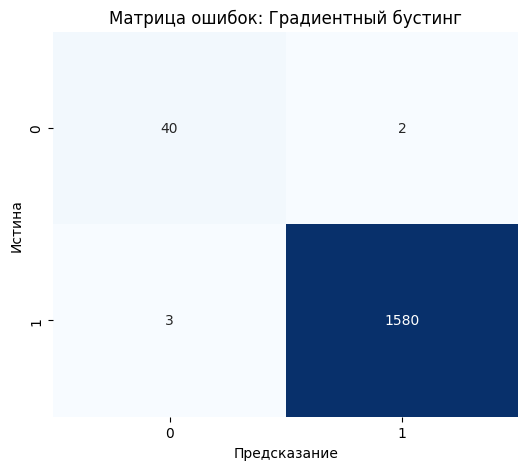


=== Наивный Байес ===
Accuracy  : 0.9982
Precision : 0.9983
Recall    : 0.9982
F1-Score  : 0.9982


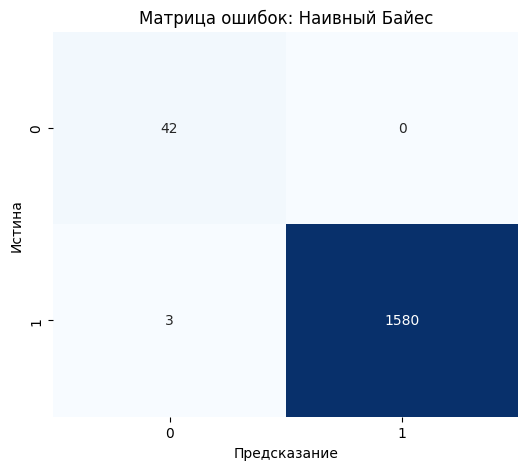


=== K ближайших соседей ===
Accuracy  : 0.9982
Precision : 0.9983
Recall    : 0.9982
F1-Score  : 0.9982


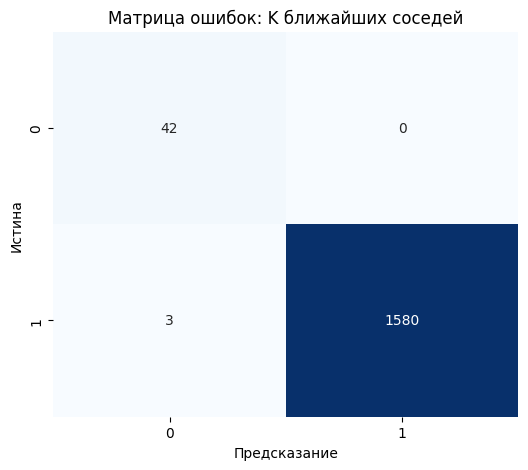


==== Обучение моделей для gill-spacing ====


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Логистическая регрессия ===
Accuracy  : 0.9902
Precision : 0.9902
Recall    : 0.9902
F1-Score  : 0.9902


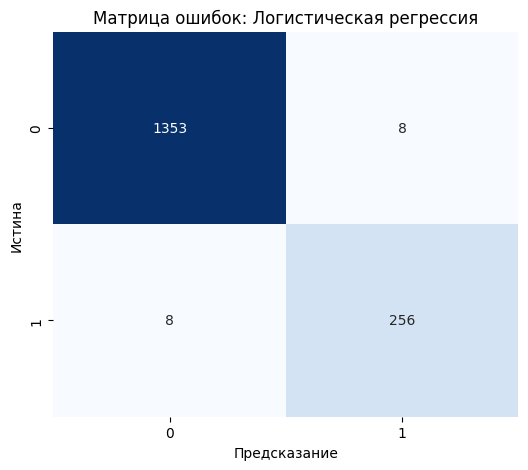


=== Дерево решений ===
Accuracy  : 0.9705
Precision : 0.9701
Recall    : 0.9705
F1-Score  : 0.9700


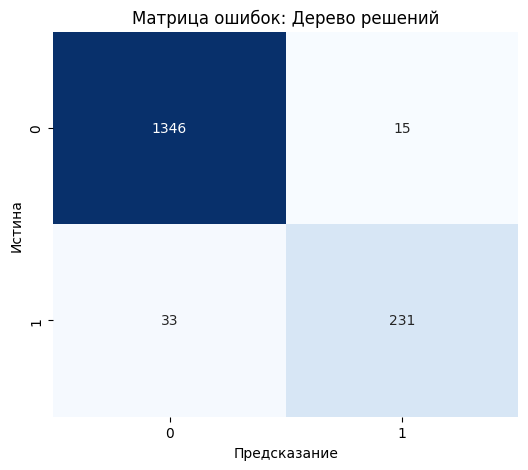


=== Случайный лес ===
Accuracy  : 0.9785
Precision : 0.9787
Recall    : 0.9785
F1-Score  : 0.9785


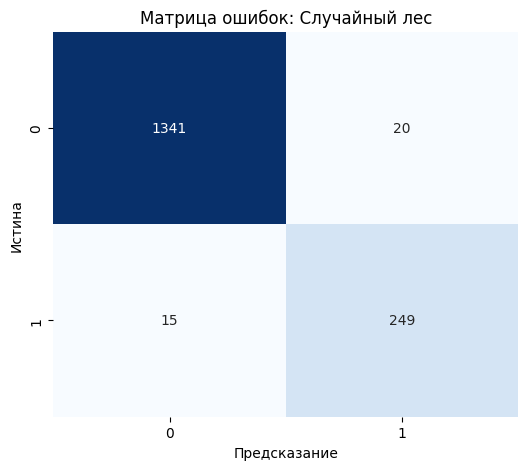


=== Градиентный бустинг ===
Accuracy  : 0.9852
Precision : 0.9852
Recall    : 0.9852
F1-Score  : 0.9852


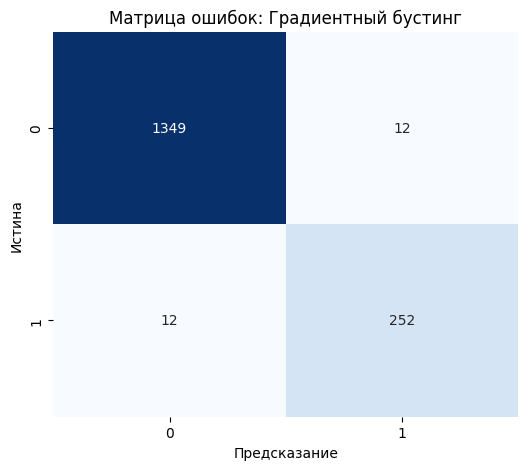


=== Наивный Байес ===
Accuracy  : 0.9465
Precision : 0.9597
Recall    : 0.9465
F1-Score  : 0.9494


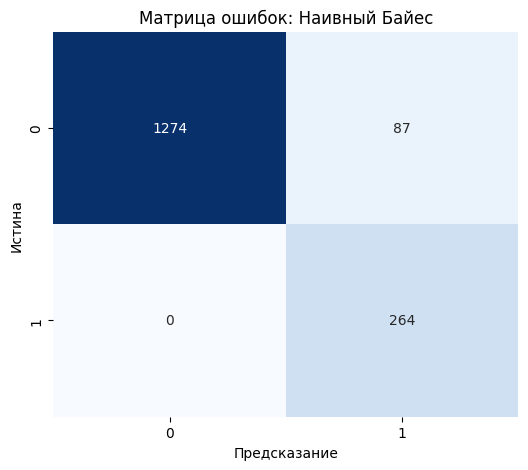


=== K ближайших соседей ===
Accuracy  : 0.9834
Precision : 0.9834
Recall    : 0.9834
F1-Score  : 0.9834


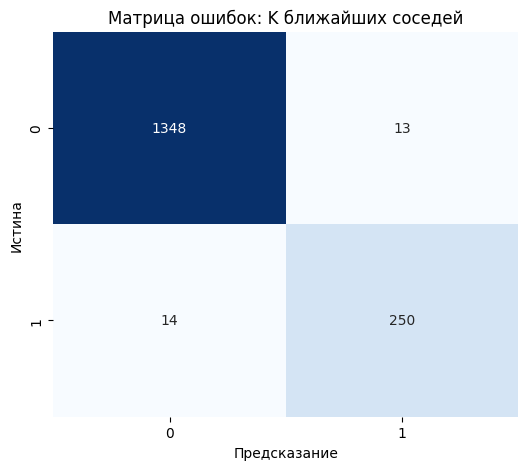


==== Обучение моделей для gill-size ====

=== Логистическая регрессия ===
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


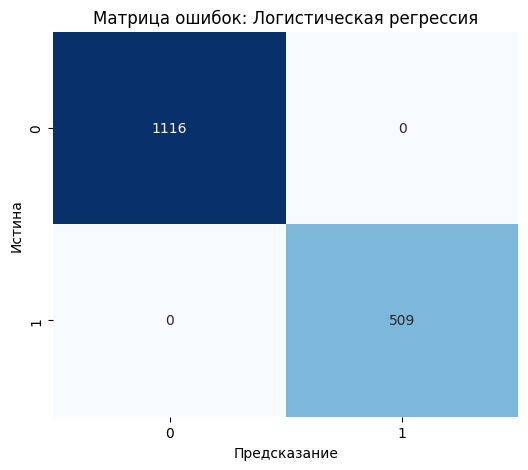


=== Дерево решений ===
Accuracy  : 0.9625
Precision : 0.9644
Recall    : 0.9625
F1-Score  : 0.9618


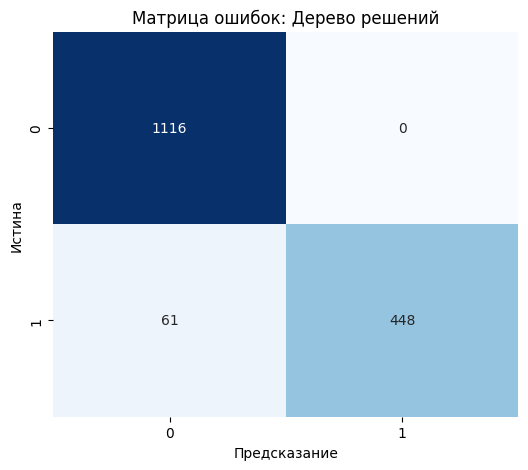


=== Случайный лес ===
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


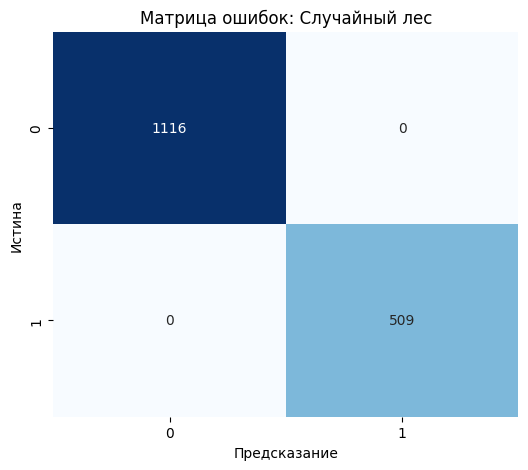


=== Градиентный бустинг ===
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


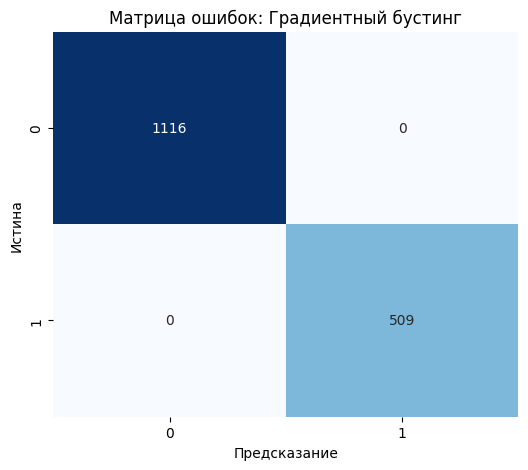


=== Наивный Байес ===
Accuracy  : 0.8431
Precision : 0.8955
Recall    : 0.8431
F1-Score  : 0.8487


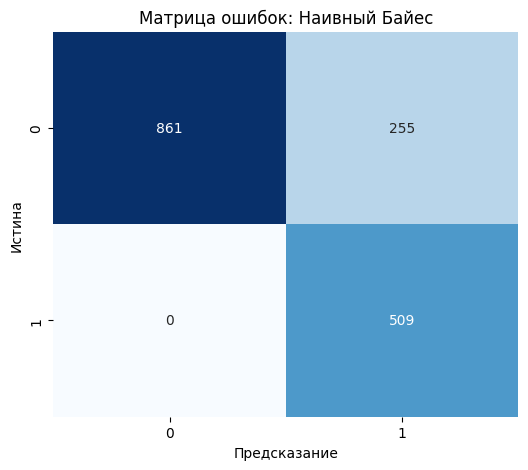


=== K ближайших соседей ===
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


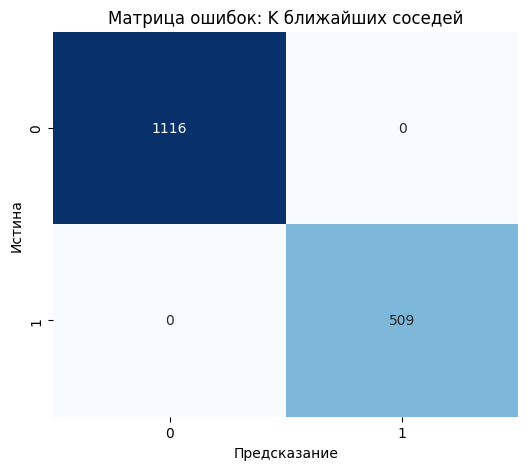


==== Обучение моделей для gill_combined ====

=== Логистическая регрессия ===
Accuracy  : 0.9883
Precision : 0.9883
Recall    : 0.9883
F1-Score  : 0.9883


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


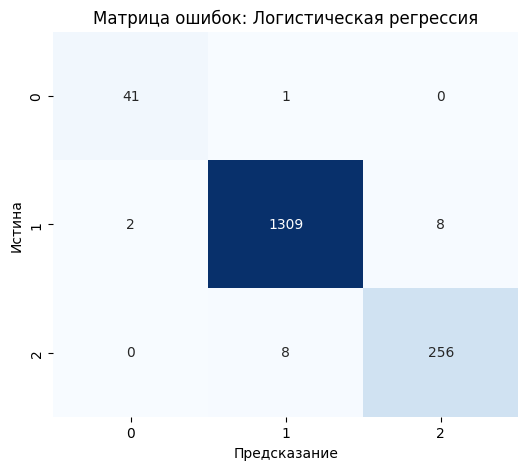


=== Дерево решений ===
Accuracy  : 0.9692
Precision : 0.9694
Recall    : 0.9692
F1-Score  : 0.9684


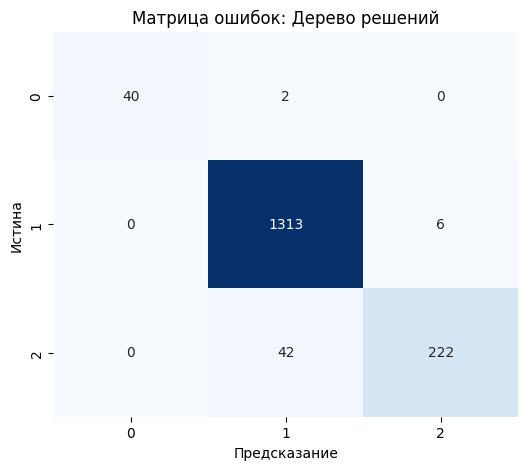


=== Случайный лес ===
Accuracy  : 0.9754
Precision : 0.9756
Recall    : 0.9754
F1-Score  : 0.9755


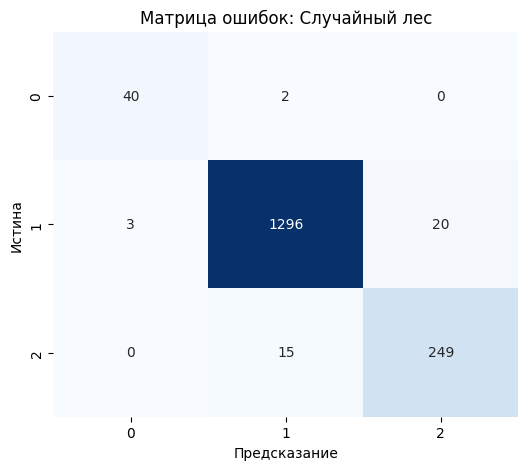


=== Градиентный бустинг ===
Accuracy  : 0.9840
Precision : 0.9843
Recall    : 0.9840
F1-Score  : 0.9841


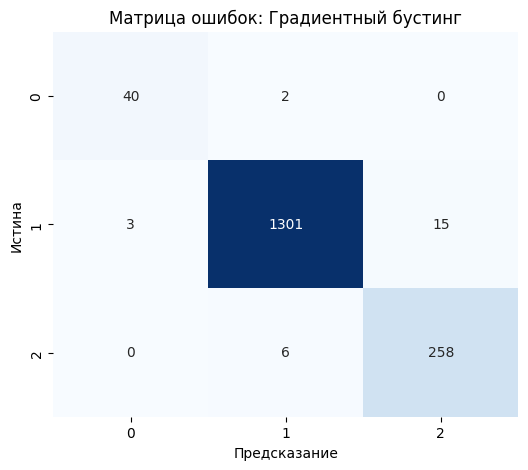


=== Наивный Байес ===
Accuracy  : 0.9446
Precision : 0.9580
Recall    : 0.9446
F1-Score  : 0.9475


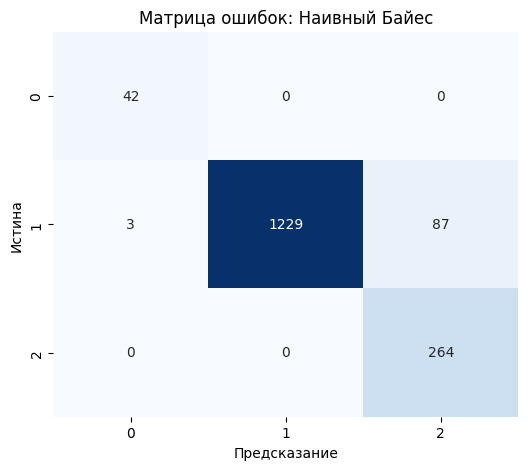


=== K ближайших соседей ===
Accuracy  : 0.9815
Precision : 0.9816
Recall    : 0.9815
F1-Score  : 0.9815


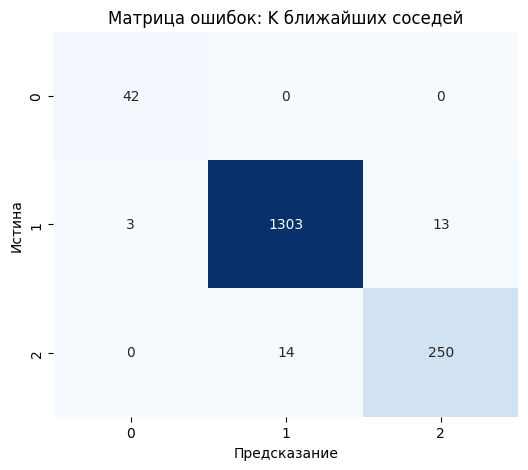

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Загружаем данные
df = pd.read_csv("mushrooms.csv")  # Замените на путь к файлу

# Целевые переменные
target_columns = ["gill-attachment", "gill-spacing", "gill-size"]

# Создаем комбинированную целевую переменную
df["gill_combined"] = df[target_columns[0]].astype(str) + "-" + df[target_columns[1]].astype(str)
df["gill_combined"] = LabelEncoder().fit_transform(df["gill_combined"])

# Кодируем целевые переменные
label_encoders = {}
for col in target_columns + ["gill_combined"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Выбираем признаки (все, кроме целевых переменных)
X = df.drop(columns=target_columns + ["gill_combined"])
X = pd.get_dummies(X)  # One-Hot Encoding

def train_and_evaluate(X, y, model, model_name):
    # Убедимся, что y одномерный
    y = np.ravel(y)  # Это гарантирует, что y будет одномерным
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    print(f"\n=== {model_name} ===")
    print(f'Accuracy  : {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision : {precision_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Recall    : {recall_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'F1-Score  : {f1_score(y_test, y_pred, average="weighted"):.4f}')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Матрица ошибок: {model_name}')
    plt.xlabel('Предсказание')
    plt.ylabel('Истина')
    plt.show()

# Определяем модели
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Дерево решений": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Случайный лес": RandomForestClassifier(n_estimators=100, random_state=42),
    "Градиентный бустинг": XGBClassifier(n_estimators=30, max_depth=5, random_state=21),
    "Наивный Байес": GaussianNB(),
    "K ближайших соседей": KNeighborsClassifier(n_neighbors=5)
}

# Обучаем модели для каждой целевой переменной
for target in target_columns:
    print(f"\n==== Обучение моделей для {target} ====")
    y = df[target].values  # Преобразуем y в одномерный массив
    for model_name, model in models.items():
        train_and_evaluate(X, y, model, model_name)

# Также можно обучить модель для комбинированной цели:
print(f"\n==== Обучение моделей для gill_combined ====")
y_combined = df['gill_combined'].values  # Преобразуем y_combined в одномерный массив
for model_name, model in models.items():
    train_and_evaluate(X, y_combined, model, model_name)
